In [164]:
from PIL import Image
import imagehash
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import hamming
from collections import deque
from pprint import pprint
import skimage
import numpy as np
import cv2
import matplotlib


In [165]:
known_events = [15505, 23565, 38750]
                

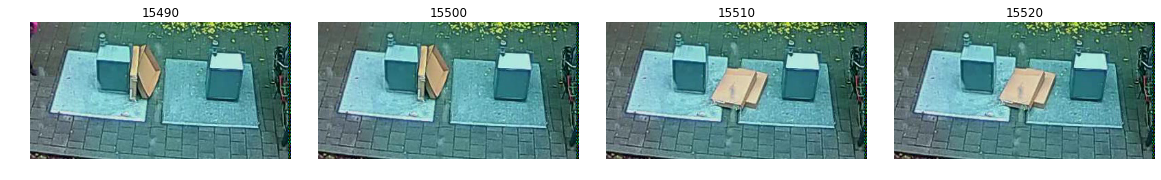

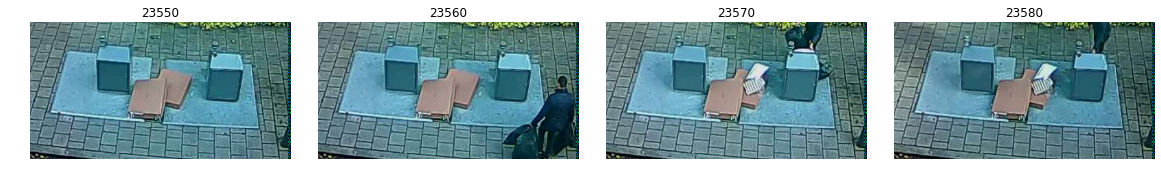

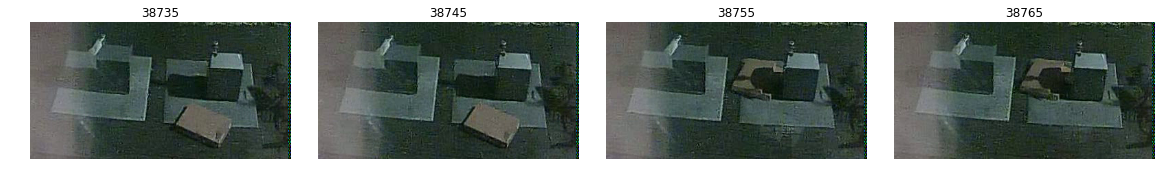

In [167]:
%matplotlib inline
cap = cv2.VideoCapture('trashcam 1.avi')
matplotlib.rcParams['figure.figsize'] = (16.0, 3)
for fn in known_events:
    fig, ax = plt.subplots(nrows=1, ncols=4)
    fig.tight_layout(pad=0, w_pad=0, h_pad=0)
    for i in range(4):
        f = (fn - 15) + (10*i)
  
        cap.set(1,f)
        ret, frame = cap.read()
        ax[i].axis("off")
        ax[i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        ax[i].set_title(str(f))
        ax[i].set_xmargin(0)
        ax[i].set_ymargin(0)

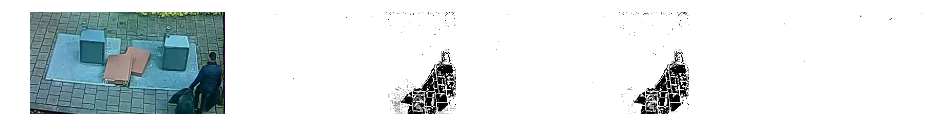

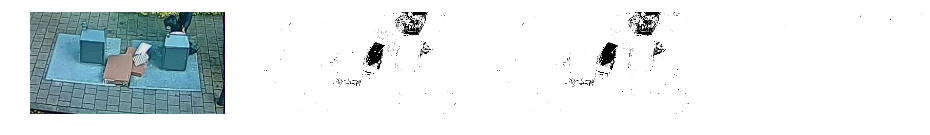

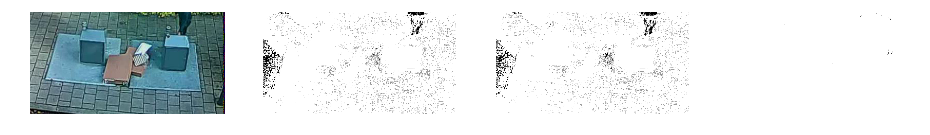

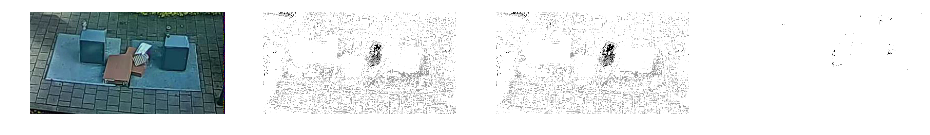

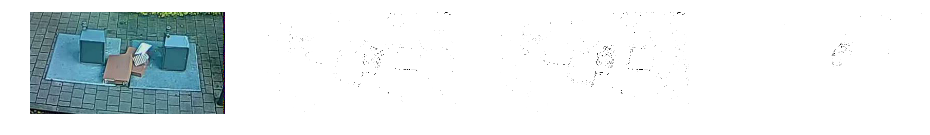

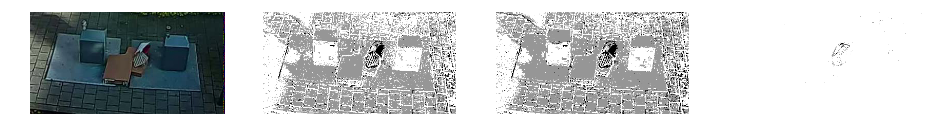

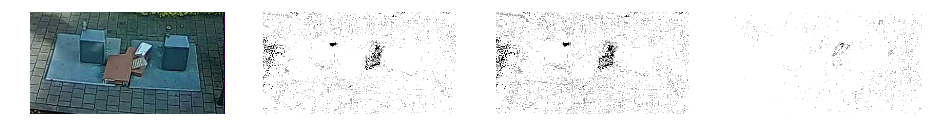

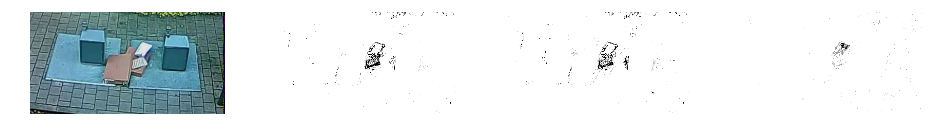

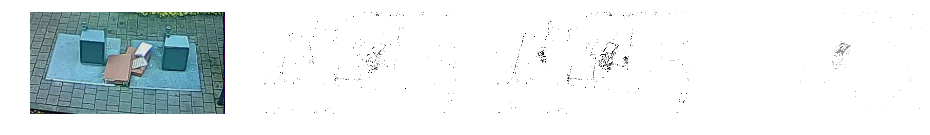

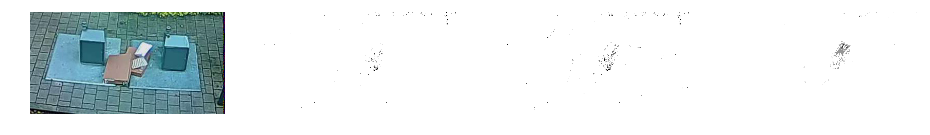

In [195]:
# 1. construct two background subtractors. 
# 2. feed delayed data to one of the subtractors, 
# 3. subtract the background subtractors
# If the two background subtractors are much different, something significant and persistent must have changed

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 4.0)
cap = cv2.VideoCapture('trashcam 1.avi')
cap.set(1,15516)
bg1 = cv2.createBackgroundSubtractorMOG2(history=100)
bg2 = cv2.createBackgroundSubtractorMOG2(history=100)
frames = deque(maxlen=50)



event = known_events[1]
for f in range(event-300,event+100):
    cap.set(1,f)
    ret, frame = cap.read()
    frames.append(frame)
    current_bg = bg1.apply(frame)
    bg2.apply(frames[0])
    historic_bg = bg2.apply(frame,0)
    
    if event - 15 < f < event + 95 and f % 10 == 0:
        fig, ax = plt.subplots(nrows=1, ncols=4)
        ax[0].axis("off")
        ax[1].axis("off")
        ax[2].axis("off")
        ax[3].axis("off")
        ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        ax[1].imshow(current_bg,cmap='Greys')
        ax[2].imshow(historic_bg,cmap='Greys')
        ax[3].imshow(bg2.apply(bg1.getBackgroundImage(),0),cmap='Greys')
        fig.canvas.draw()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


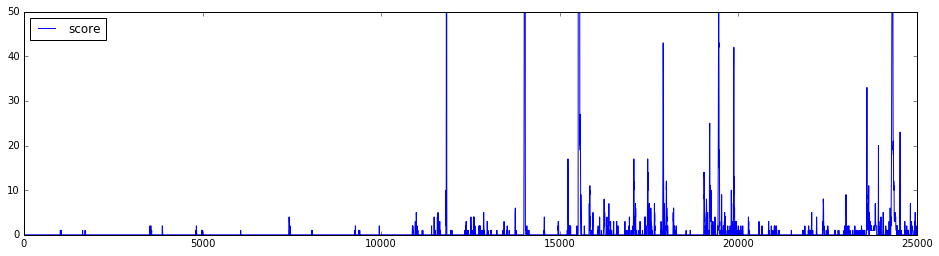

In [216]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 4.0)
cap = cv2.VideoCapture('trashcam 1.avi')
bg1 = cv2.createBackgroundSubtractorMOG2(history=100)
bg2 = cv2.createBackgroundSubtractorMOG2(history=100)
frames = deque(maxlen=50)

scores = pd.DataFrame(columns=['score'])

event = known_events[2]
for f in range(0,25000):
    cap.set(1,f)
    ret, frame = cap.read()
    frames.append(frame)
    current_bg = bg1.apply(frame)
    bg2.apply(frames[0])
    historic_bg = bg2.apply(frame,0)
    
    score = np.sum(bg2.apply(bg1.getBackgroundImage(),0).flatten() == 255)
    scores.loc[f] = score
    if f % 1000 == 0:
        print(f)
scores.plot(ylim=[0,50])

In [218]:
import peakutils

In [268]:
indexes = peakutils.indexes(scores['score'].values, thres=0.005, min_dist=50) - 40
indexes

array([  -39, 11793, 13981, 15509, 17859, 19414, 19836, 23564, 24277])

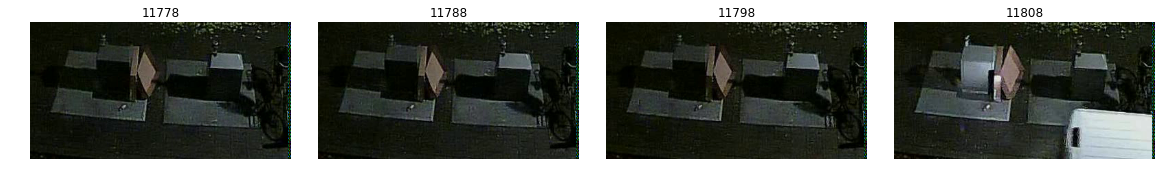

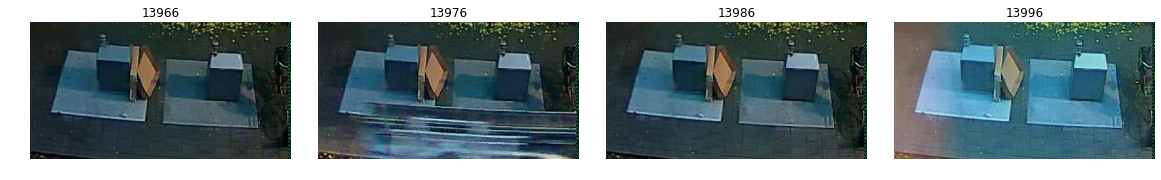

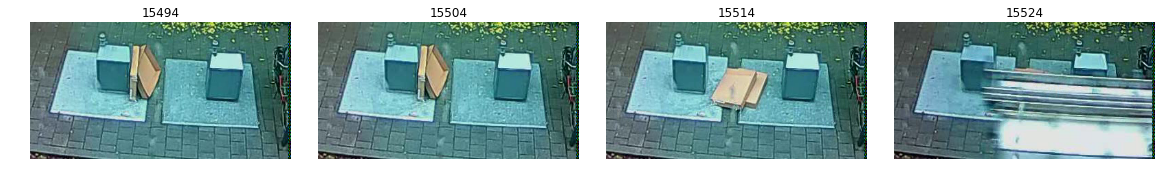

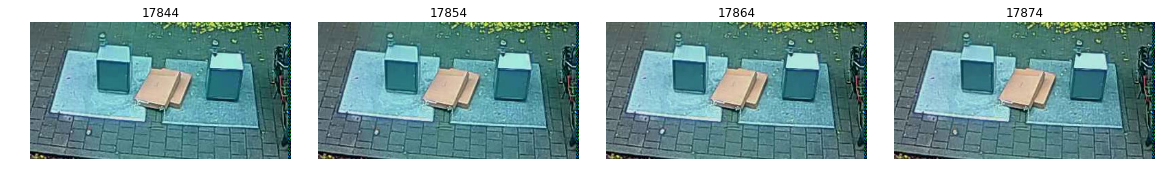

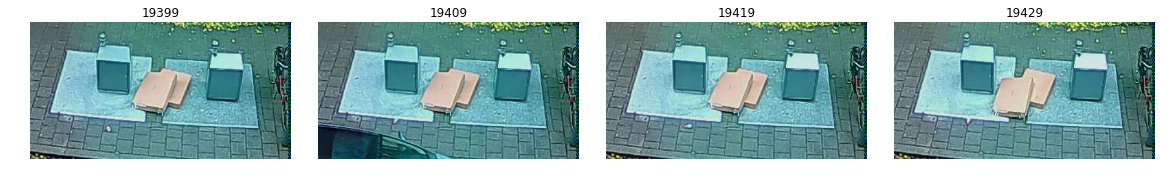

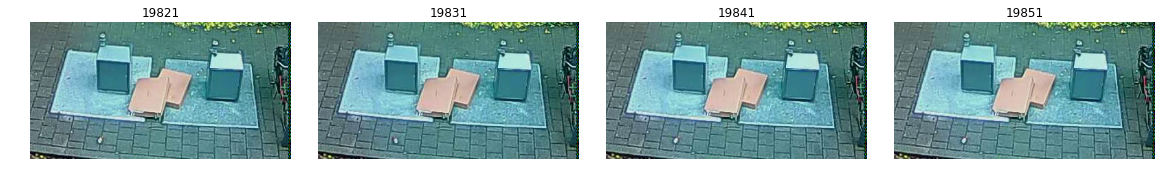

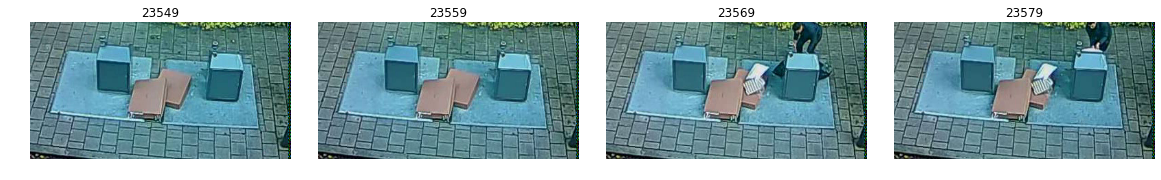

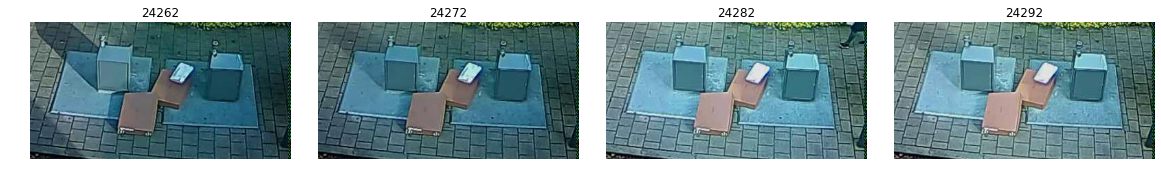

In [269]:
%matplotlib inline
cap = cv2.VideoCapture('trashcam 1.avi')
matplotlib.rcParams['figure.figsize'] = (16.0, 3)
for fn in indexes[1:]:
    fig, ax = plt.subplots(nrows=1, ncols=4)
    fig.tight_layout(pad=0, w_pad=0, h_pad=0)
    for i in range(4):
        f = (fn - 15) + (10*i)
  
        cap.set(1,f)
        ret, frame = cap.read()
        ax[i].axis("off")
        ax[i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        ax[i].set_title(str(f))
        ax[i].set_xmargin(0)
        ax[i].set_ymargin(0)